In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Paths to the dataset folders
train_dir = 'dataset/train'
val_dir = 'dataset/val'
test_dir = 'dataset/test'

# Data Augmentation for Training Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    zoom_range=0.1,  
    shear_range=0.1  
)

# No Augmentation for Validation and Test Data
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load Training Data with Augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load Validation and Test Data
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


Found 2134 images belonging to 2 classes.
Found 458 images belonging to 2 classes.
Found 458 images belonging to 2 classes.
Epoch 1/20
66/66 [==============================] - 26s 383ms/step - loss: 0.5777 - accuracy: 0.7583 - val_loss: 0.3240 - val_accuracy: 0.9308
Epoch 2/20
66/66 [==============================] - 26s 388ms/step - loss: 0.3299 - accuracy: 0.8863 - val_loss: 0.3099 - val_accuracy: 0.9397
Epoch 3/20
66/66 [==============================] - 26s 386ms/step - loss: 0.2950 - accuracy: 0.9029 - val_loss: 0.3074 - val_accuracy: 0.9375
Epoch 4/20
66/66 [==============================] - 26s 396ms/step - loss: 0.2693 - accuracy: 0.9082 - val_loss: 0.3329 - val_accuracy: 0.9308
Epoch 5/20
66/66 [==============================] - 26s 393ms/step - loss: 0.2568 - accuracy: 0.9163 - val_loss: 0.2301 - val_accuracy: 0.9353
Epoch 6/20
66/66 [==============================] - 26s 399ms/step - loss: 0.2584 - accuracy: 0.9120 - val_loss: 0.2545 - val_accuracy: 0.9286
Epoch 7/20
66/66 [

In [6]:
import io

# Assuming 'model' is already loaded or built
stream = io.StringIO()
model.summary(print_fn=lambda x: stream.write(x + "\n"))
summary_string = stream.getvalue()
stream.close()

# Display or further process the formatted summary string
print(summary_string)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

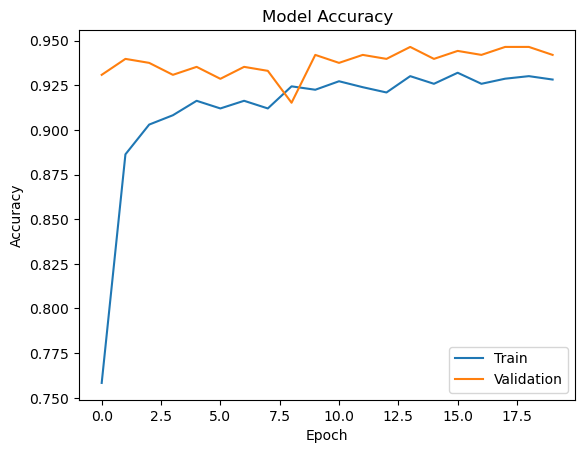

In [3]:
import matplotlib.pyplot as plt

# Assuming the previous model and training code has been run

# Save the trained model to an .h5 file
model.save('pneumonia_detection_model2.h5')

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()
